# p1. Regression


- 기수: 12

- 이름: 서지니

- 작성자: 9기 이승원


_해당 실습 자료는 23-2 응용통계학과 김현중 교수님의 [데이터마이닝]의 수업자료와 해당 수업에서 본 출제자가 진행한 프로젝트를 기반으로 만들었음을 밝힙니다._


### 01. Setting


In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/DSL/기초과제/2주차/[0730]_Regression+SVM+비지도학습/Regression+SVM+비지도학습/data/bicycle_data.xlsx")
df.head()

행정동   이용건수     행정동코드  자치구  대여소개수       이용거리(M)  이용시간(분)  LCD_거치_대수  \
0  청운효자동  11755  11110515  종로구      3  2.904426e+07   284027          5   
1    사직동  58976  11110530  종로구     12  1.243033e+08  1195279         99   
2    삼청동  15960  11110540  종로구      5  3.520926e+07   368791         23   
3    부암동   4353  11110550  종로구      5  1.896218e+07   126968         23   
4    평창동   3810  11110560  종로구      5  1.410898e+07    94067         15   

   QR_거치_대수  상권_수  ...     여자20s생활인구     여자30s생활인구     여자40s생활인구  \
0        59     5  ...  2.885425e+06  3.143521e+06  3.745018e+06   
1       139     6  ...  5.133218e+06  6.282004e+06  5.561868e+06   
2        38     1  ...  1.157874e+06  1.197700e+06  1.266266e+06   
3        26     5  ...  2.305686e+06  1.908983e+06  2.804853e+06   
4        23     3  ...  1.935554e+06  2.306512e+06  3.250538e+06   

      여자50s생활인구     여자60s생활인구   여자70s이상생활인구  아파트_단지_수  아파트_평균_시가  길단위유동인구  \
0  3.170072e+06  2.157854e+06  2.640629e+06       323  276146690    14261   
1  4.041477e+06  2.650009e+06  2.740232e+06        89  371237211    34035   
2  9.427540e+05  7.849797e+05  7.954017e+05         9  401044841     6745   
3  2.466070e+06  1.871393e+06  2.216136e+06       189  259634651     5001   
4  3.803050e+06  3.117086e+06  3.559939e+06       294  480839259      878   

   직장인구  
0    41  
1   413  
2    40  
3    18  
4    26  

[5 rows x 76 columns]

In [4]:
df.shape

(424, 76)

### 02. Linear Regression


#### 02-1. Data Preprocessing


우선, 분석에 필요하지 않은 열을 제거한다. (독립변수의 임의 제거가 아닌, 애초에 분석에 불필요한 정보를 제거한다.)


In [5]:
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수'], axis=1)

# Check dropped columns
df1.columns

Index(['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구'],
      dtype='object')

앞서 살펴보았듯, 각 변수들의 범위는 상당히 다르다.

회귀분석은 데이터의 단위 (범위)에 민감하기 때문에 Scaling이 필요하다.

<hr/>


In [6]:
df1.head()

이용건수  상권_수  집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  약국_수  유치원_수  ...  \
0  11755     5      24      3     1      0       0        0     1      0  ...   
1  58976     6     200     12    22      0       0        0    20      0  ...   
2  15960     1      16      3     1      0       0        0     0      0  ...   
3   4353     5      46      3     2      0       0        0     2      0  ...   
4   3810     3      86      4     1      0       0        0     2      1  ...   

      여자20s생활인구     여자30s생활인구     여자40s생활인구     여자50s생활인구     여자60s생활인구  \
0  2.885425e+06  3.143521e+06  3.745018e+06  3.170072e+06  2.157854e+06   
1  5.133218e+06  6.282004e+06  5.561868e+06  4.041477e+06  2.650009e+06   
2  1.157874e+06  1.197700e+06  1.266266e+06  9.427540e+05  7.849797e+05   
3  2.305686e+06  1.908983e+06  2.804853e+06  2.466070e+06  1.871393e+06   
4  1.935554e+06  2.306512e+06  3.250538e+06  3.803050e+06  3.117086e+06   

    여자70s이상생활인구  아파트_단지_수  아파트_평균_시가  길단위유동인구  직장인구  
0  2.640629e+06       323  276146690    14261    41  
1  2.740232e+06        89  371237211    34035   413  
2  7.954017e+05         9  401044841     6745    40  
3  2.216136e+06       189  259634651     5001    18  
4  3.559939e+06       294  480839259      878    26  

[5 rows x 68 columns]

- **Point 1. Robust Scaler를 사용하는 이유는 해당 Method가 중앙값과 삽누위수 범위를 사용하므로 Outlier에 덜 민감하기 때문이다. 따라서 별도의 Outlier 처리를 포함하진 않는다.**

- **Point 2. OLS를 돌릴 때, 컬럼명이 숫자로 시작하면 오류가 뜬다. (출제자가 실제 회귀분석과제를 할 때 에러가 떠서 고생을 했던 기억이 있어 꼭 기억하면 좋겠다.)**


In [7]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = robust_scaler.transform(df1)
df2_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# OLS에 알맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df2_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [8]:
df2_scaled.head()

이용건수      상권_수    집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  \
0 -0.370264  0.333333 -0.422145    0.5  0.00    0.0     0.0      0.0   
1  1.192504  0.666667  2.013841    5.0  5.25    0.0     0.0      0.0   
2 -0.231101 -1.000000 -0.532872    0.5  0.00    0.0     0.0      0.0   
3 -0.615232  0.333333 -0.117647    0.5  0.25    0.0     0.0      0.0   
4 -0.633202 -0.333333  0.435986    1.0  0.00    0.0     0.0      0.0   

       약국_수  유치원_수  ...  여자20s생활인구  여자30s생활인구  여자40s생활인구  여자50s생활인구  \
0 -0.555556    0.0  ...  -0.186164  -0.188702   0.023044  -0.156918   
1  1.555556    0.0  ...   0.476562   0.844300   0.655541   0.240888   
2 -0.666667    0.0  ...  -0.695505  -0.829151  -0.839882  -1.173713   
3 -0.444444    0.0  ...  -0.357091  -0.595038  -0.304255  -0.478303   
4 -0.444444    1.0  ...  -0.466219  -0.464196  -0.149099   0.132043   

   여자60s생활인구  여자70s이상생활인구  아파트_단지_수  아파트_평균_시가   길단위유동인구      직장인구  
0  -0.370213    -0.254954  0.444662   0.046755 -0.752024  0.000000  
1  -0.086386    -0.200455 -0.472086   0.450052 -0.385100  5.975904  
2  -1.161956    -1.264595 -0.785504   0.576471 -0.891490 -0.016064  
3  -0.535416    -0.487221 -0.080313  -0.023275 -0.923851 -0.369478  
4   0.182979     0.248059  0.331048   0.914894 -1.000357 -0.240964  

[5 rows x 68 columns]

#### 02-2. Feature Selection


독립변수와 종속변수에 해당하는 변수들을 각각 할당한다.


In [9]:
X = df2_scaled.drop('이용건수', axis=1)
y = df2_scaled['이용건수']

파이썬에서는 자체적으로 feature selection module을 제공하지 않는다.

본 과제에서는 함께 제공한 _./src/feature_selection.py_ 를 사용하여 진행하도록 하겠다.


사용시 주의할 점은 다음과 같다.

- 1. 현재 분석이 Linear Regression이니 'linear' 선택
- 2. AIC를 기준으로 Feature를 선택할 것이기에 'aic' 선택


In [ ]:
import utils.feature_selection as fsel
# imoprt feature_selection import fsel -> if feature_selection.py at same directory

fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

앞선 Feature Selection을 통해 선택된 변수들을 대사응로, 다중공선성을 만족하는지 확인한다.

다중공선성을 만족하는 변수들의 조합으로 선형 회귀 분석을 진행한다.

- 다중공선성 판별 기준: VIF값 10 이하


In [10]:
# feature selection을 통해 선택된 변수들을 리스트 형태로 입력!

selected_cols = ['남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 초기화
vif_data = df2_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

남자40s생활인구      2.612474
_30s_korean    1.970809
아파트_단지_수       1.338337
길단위유동인구        1.042099
초등학교_수         1.042781
직장인구           1.444073
지하철_하차         1.753606
Intercept      1.327840
dtype: float64


['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수', '직장인구', '지하철_하차']

In [12]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df2_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.75e-40
Time:                        14:13:36   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1797      0.057      3.148      0.002       0.067       0.292
남자40s생활인구       0.4433      0.071      6.228      0.000       0.303       0.583
_30s_korean     0.4910      0.090      5.451      0.000       0.314       0.668
아파트_단지_수       -0.3688      0.072     -5.098      0.000      -0.511      -0.227
길단위유동인구        -0.1829      0.067     -2.712      0.007      -0.316      -0.050
초등학교_수          0.7257      0.273      2.662      0.008       0.190       1.262
직장인구           -0.0668      0.024     -2.775      0.006      -0.114      -0.019
지하철_하차          0.1150      0.053      2.169      0.031       0.011       0.219
==============================================================================
Omnibus:                      386.066   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20893.959
Skew:                           3.582   Prob(JB):                         0.00
Kurtosis:                      36.636   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 02-3. Evaluation


In [13]:
# sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 사용

from sklearn.model_selection import train_test_split

train, test = train_test_split(df2_scaled, test_size=0.3, random_state=1)
print('train:', len(train), '| test:', len(test))

train: 296 | test: 128


In [14]:
X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

In [15]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

pred = result.predict(X_test)

In [16]:
print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

r2: 0.4645130532216033
mse: 1.5950294642500684
mae: 0.689016731517567
mape: 2.2034124083054976


#### 02-4. Regression


In [17]:
import statsmodels.api as sm

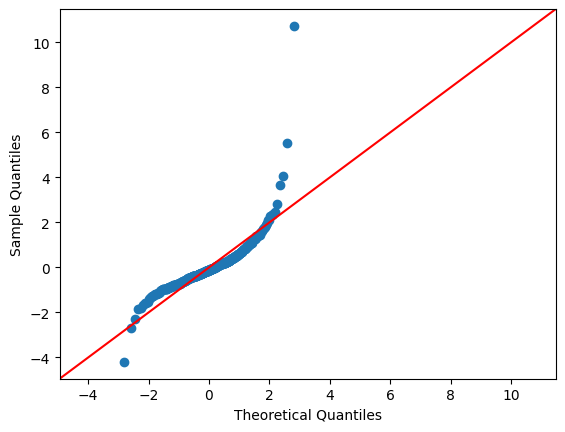

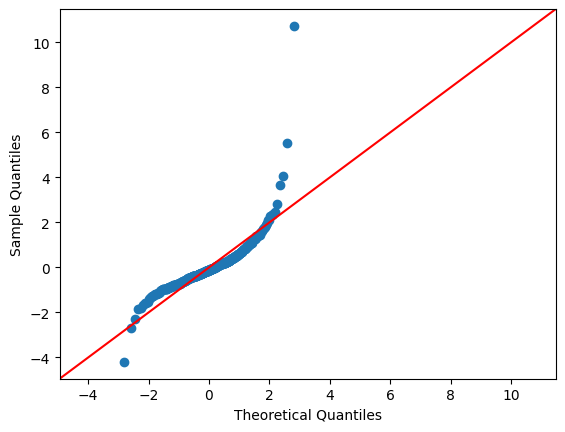

In [18]:
import seaborn as sns
import matplotlib as plt

sm.qqplot(result.resid, fit=True, line='45')

<Axes: xlabel='fitted', ylabel='resid'>

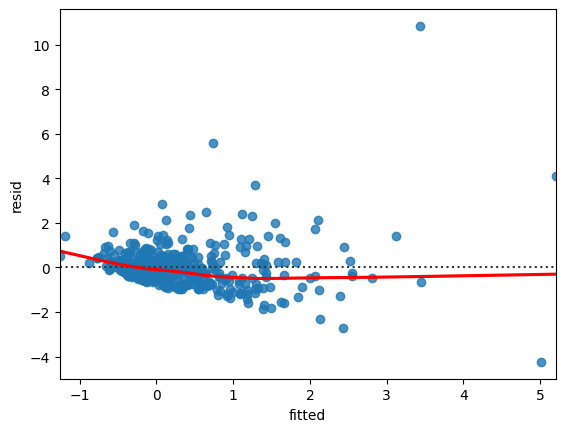

In [19]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

#### 02-5. TODO


**다양한 Scaling 방법과 Forward/Backward Selection 및 각종 Feature Selection 방법을 이용해 Linear Regression을 실습해보세요.**


robust 스케일링 -> backward selection -> vif 확인 -> linear regression

In [42]:
######## TODO ########



######## TODO ########

In [21]:
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수'], axis=1)

# Check dropped columns
df1.columns

Index(['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구'],
      dtype='object')

In [22]:
df1.describe()

이용건수        상권_수      집객시설_수       관공서_수        은행_수  \
count     424.000000  424.000000  424.000000  424.000000  424.000000   
mean    32832.054245    3.891509   77.676887    2.587264    3.775943   
std     39004.381276    2.519432   84.860597    2.947440    7.837250   
min         0.000000    0.000000    0.000000    0.000000    0.000000   
25%     10558.500000    2.000000   27.000000    1.000000    0.000000   
50%     22943.000000    4.000000   54.500000    2.000000    1.000000   
75%     40774.750000    5.000000   99.250000    3.000000    4.000000   
max    454535.000000   17.000000  768.000000   22.000000   80.000000   

            총병원_수      종합병원_수     일반_병원_수        약국_수       유치원_수  ...  \
count  424.000000  424.000000  424.000000  424.000000  424.000000  ...   
mean     0.455189    0.056604    0.398585    8.780660    0.415094  ...   
std      0.981084    0.250963    0.890771    9.573975    0.757848  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    3.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    6.000000    0.000000  ...   
75%      1.000000    0.000000    0.000000   12.000000    1.000000  ...   
max      6.000000    2.000000    6.000000   80.000000    6.000000  ...   

          여자20s생활인구     여자30s생활인구     여자40s생활인구     여자50s생활인구     여자60s생활인구  \
count  4.240000e+02  4.240000e+02  4.240000e+02  4.240000e+02  4.240000e+02   
mean   4.616359e+06  4.582234e+06  4.366794e+06  3.896961e+06  2.990704e+06   
std    4.100464e+06  3.111833e+06  2.460426e+06  1.741887e+06  1.285759e+06   
min    4.623928e+05  5.626901e+05  7.593437e+05  6.026789e+05  4.395341e+05   
25%    2.193694e+06  2.633365e+06  2.708511e+06  2.635332e+06  2.048217e+06   
50%    3.516845e+06  3.716839e+06  3.678826e+06  3.513805e+06  2.799801e+06   
75%    5.585430e+06  5.671580e+06  5.581010e+06  4.825860e+06  3.782209e+06   
max    3.996098e+07  3.121021e+07  1.817787e+07  1.110280e+07  9.221236e+06   

        여자70s이상생활인구     아파트_단지_수     아파트_평균_시가        길단위유동인구         직장인구  
count  4.240000e+02   424.000000  4.240000e+02     424.000000   424.000000  
mean   3.342664e+06   264.285377  3.900812e+08   58874.528302    90.716981  
std    1.457001e+06   202.461160  3.523994e+08   40458.019669   154.271475  
min    4.582626e+05     1.000000  1.007386e+08      93.000000     2.000000  
25%    2.323051e+06   118.750000  1.889878e+08   27684.500000    22.000000  
50%    3.106585e+06   209.500000  2.651226e+08   54788.500000    41.000000  
75%    4.150659e+06   374.000000  4.247710e+08   81575.750000    84.250000  
max    9.993622e+06  1242.000000  2.672554e+09  389419.000000  1944.000000  

[8 rows x 68 columns]

In [28]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = robust_scaler.transform(df1)
df2_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# OLS에 알맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df2_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [29]:
X = df2_scaled.drop('이용건수', axis=1)
y = df2_scaled['이용건수']

In [25]:
def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    last_eleminated = ""
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break
            else:
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues)
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")

                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols

In [30]:
print(__backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05))

Eliminated : 아파트_평균_시가
Eliminated : 종합병원_수
Eliminated : _90s_foreigner
Eliminated : 숙박_시설_수
Eliminated : _80s_korean
Eliminated : 상권_수
Eliminated : 고등학교_수
Eliminated : 초등학교_수
Eliminated : 슈퍼마켓_수
Eliminated : 극장_수
Eliminated : _10s_foreigner
Eliminated : 관공서_수
Eliminated : _40s_korean
Eliminated : _80s_foreigner
Eliminated : 일반_병원_수
Eliminated : 총병원_수
Eliminated : 여자50s생활인구
Eliminated : 남자60s생활인구
Eliminated : 남자50s생활인구
Eliminated : 대중교통_하차
Eliminated : 지하철_승차
Eliminated : 버스_하차
Eliminated : 약국_수
Eliminated : 중학교_수
Eliminated : 여자70s이상생활인구
Eliminated : 남자40s생활인구
Eliminated : 여자10s생활인구
Eliminated : 집객시설_수
Eliminated : 여자0s생활인구
Eliminated : 남자70s이상생활인구
Eliminated : 여자30s생활인구
Eliminated : 대학교_수
Eliminated : _90s_korean
Eliminated : _100s_foreigner
Eliminated : _0s_foreigner
Eliminated : 여자40s생활인구
Regained :  여자40s생활인구
                                 OLS Regression Results                                
Dep. Variable:                   이용건수   R-squared (uncentered):                   0.535

In [31]:
selected_cols = ['은행_수', '유치원_수', '초중고등학교_수', '백화점_수', '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner', '_60s_foreigner', '_70s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '버스_승차', '지하철_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구', '남자30s생활인구', '여자20s생활인구', '여자40s생활인구', '여자60s생활인구', '아파트_단지_수', '길단위유동인구', '직장인구']

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 초기화
vif_data = df2_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

In [35]:
# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

In [38]:
vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])


selected_cols

은행_수                4.310807
유치원_수               1.266219
초중고등학교_수            1.122208
백화점_수               1.520727
_20s_foreigner      9.370778
_30s_foreigner     16.856129
_40s_foreigner     32.997421
_50s_foreigner     74.925723
_60s_foreigner     60.830865
_70s_foreigner      6.583512
_0s_korean         12.691790
_10s_korean        27.266790
_20s_korean        16.853742
_30s_korean        22.351172
_50s_korean        40.968821
_60s_korean        55.218231
_70s_korean        18.092384
_100s_korean        1.579951
총생활인구수            673.487735
대중교통_승차           987.712829
버스_승차              97.774930
지하철_하차            638.761651
남자0s생활인구           11.273514
남자10s생활인구          13.364549
남자20s생활인구          34.956568
남자30s생활인구          96.723983
여자20s생활인구          45.791495
여자40s생활인구         113.243506
여자60s생활인구          44.754638
아파트_단지_수            2.298755
길단위유동인구             1.420892
직장인구                1.826114
Intercept          16.235871
dtype: float64


['은행_수',
 '유치원_수',
 '초중고등학교_수',
 '백화점_수',
 '_20s_foreigner',
 '_70s_foreigner',
 '_100s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '직장인구']

In [41]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df2_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     10.22
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           2.01e-15
Time:                        14:36:38   Log-Likelihood:                -662.52
No. Observations:                 424   AIC:                             1347.
Df Residuals:                     413   BIC:                             1392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1762      0.073      2.416      0.016       0.033       0.320
은행_수               0.3215      0.038      8.449      0.000       0.247       0.396
유치원_수             -0.0601      0.082     -0.736      0.462      -0.220       0.100
초중고등학교_수           0.0186      0.165      0.113      0.910      -0.305       0.342
백화점_수             -1.2135      0.331     -3.666      0.000      -1.864      -0.563
_20s_foreigner     0.0187      0.016      1.191      0.234      -0.012       0.050
_70s_foreigner     0.0051      0.027      0.189      0.850      -0.048       0.058
_100s_korean       0.2160      0.070      3.101      0.002       0.079       0.353
아파트_단지_수          -0.0827      0.081     -1.026      0.306      -0.241       0.076
길단위유동인구           -0.1691      0.079     -2.130      0.034      -0.325      -0.013
직장인구              -0.0562      0.028     -1.989      0.047      -0.112      -0.001
==============================================================================
Omnibus:                      405.085   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21618.087
Skew:                           3.893   Prob(JB):                         0.00
Kurtosis:                      37.103   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 03. Logistic Regression


In [43]:
import pandas as pd

df_lr = pd.read_excel('/content/drive/MyDrive/DSL/기초과제/2주차/[0730]_Regression+SVM+비지도학습/Regression+SVM+비지도학습/data/bicycle_data.xlsx')

In [44]:
# Label it based on 0.5.
y_median = df['이용건수'].quantile(0.5)
df['y'] = df['이용건수'].apply(lambda x: 1 if x >= y_median else 0)

# 열 순서 재배치
df = df[['행정동', '이용건수', 'y', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']]

# 이 과정이 필요한 이유: logistic model 돌릴 때 숫자로 시작하거나, (~) 같은게 포함되어 있으면 분석이 제대로 안됨
df.columns = ['행정동', '이용건수', 'y', '대여소개수', '이용거리', '이용시간', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']

#### 01. Modeling


In [45]:
# X, y 나누기
X = df.drop(['행정동', '이용건수', 'y', '이용거리','이용시간','대여소개수'], axis=1)
y = df['y']

In [46]:
# 변수 선택을 위한 AIC 최적화 함수: 전진선택
def forward_selection_AIC(X, y):
    features = X.columns
    selected_features = []
    best_aic = float('inf')

    for feature in features:
        model = sm.Logit(y, sm.add_constant(df[selected_features + [feature]]))
        result = model.fit()
        current_aic = result.aic

        if current_aic < best_aic:
            best_aic = current_aic
            selected_features.append(feature)

    return selected_features, best_aic

# 목표 변수와 데이터 프레임을 지정하여 변수 선택 수행
response_variable = 'y'
selected_features, best_aic = forward_selection_AIC(X, y)

# 결과 출력
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)

Optimization terminated successfully.
         Current function value: 0.502605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389611
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381440
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380133
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379984
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379487
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375832
  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.369206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.368931
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366991
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361223
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360209
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361138
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360773
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360959
  

#### 02. Model Fitting


In [47]:
x_formula = '+'.join(selected_features)
x_formula = 'y~'+ x_formula
x_formula = x_formula.replace(" ", "")

model1 = smf.glm(formula = x_formula, data = df, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  424
Model:                            GLM   Df Residuals:                      410
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.52
Date:                Wed, 14 Aug 2024   Deviance:                       277.04
Time:                        14:45:13   Pearson chi2:                     460.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5195
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.6182      0.577     -8.006      0.000      -5.749      -3.488
LCD_거치_대수          0.0622      0.010      6.407      0.000       0.043       0.081
QR_거치_대수           0.0649      0.008      7.816      0.000       0.049       0.081
관공서_수             -0.2034      0.083     -2.450      0.014      -0.366      -0.041
약국_수               0.0147      0.024      0.627      0.531      -0.031       0.061
대학교_수             -0.4014      0.158     -2.539      0.011      -0.711      -0.092
_50s_foreigner    -0.0140      0.007     -1.890      0.059      -0.029       0.001
_60s_foreigner     0.0250      0.013      1.896      0.058      -0.001       0.051
_20s_korean        0.0004      0.000      2.717      0.007       0.000       0.001
버스_승차           -1.04e-06   4.25e-07     -2.445      0.014   -1.87e-06   -2.06e-07
남자0s생활인구       -8.396e-07   2.89e-07     -2.901      0.004   -1.41e-06   -2.72e-07
남자60s생활인구       8.929e-07   7.88e-07      1.133      0.257   -6.52e-07    2.44e-06
남자70s이상생활인구     -1.61e-06   6.47e-07     -2.488      0.013   -2.88e-06   -3.42e-07
여자50s생활인구       9.129e-07   4.08e-07      2.236      0.025    1.13e-07    1.71e-06
==================================================================================
"""

p-value가 0.05 이상이면 설명력을 갖는다고 봅니다.


In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats

def HosmerLemeshow(model,Y):
    pihat=model.predict()
    pihatcat=pd.cut(pihat, np.percentile(pihat,[0,25,50,75,100]), labels=False, include_lowest=True)

    meanprobs =[0]*4
    expevents =[0]*4
    obsevents =[0]*4
    meanprobs2=[0]*4
    expevents2=[0]*4
    obsevents2=[0]*4

    for i in range(4):
        meanprobs[i]=np.mean(pihat[pihatcat==i])
        expevents[i]=np.sum(pihatcat==i)*np.array(meanprobs[i])
        obsevents[i]=np.sum(Y[pihatcat==i])
        meanprobs2[i]=np.mean(1-pihat[pihatcat==i])
        expevents2[i]=np.sum(pihatcat==i)*np.array(meanprobs2[i])
        obsevents2[i]=np.sum(1-Y[pihatcat==i])

    data1={'meanprobs':meanprobs,'meanprobs2':meanprobs2}
    data2={'expevents':expevents,'expevents2':expevents2}
    data3={'obsevents':obsevents,'obsevents2':obsevents2}
    m=pd.DataFrame(data1)
    e=pd.DataFrame(data2)
    o=pd.DataFrame(data3)

    tt=sum(sum((np.array(o)-np.array(e))**2/np.array(e)))
    pvalue=1-stats.chi2.cdf(tt,2)

    return pd.DataFrame([[stats.chi2.cdf(tt,2).round(2), pvalue.round(2)]],columns = ["Chi2", "p - value"])

HosmerLemeshow(result1, y)

Chi2  p - value
0  0.92       0.08

오즈를 계산하면 다음과 같습니다.


In [53]:
import numpy as np

odds = np.exp(result1.params)
odds

Intercept         0.009870
LCD_거치_대수         1.064165
QR_거치_대수          1.067069
관공서_수             0.815965
약국_수              1.014850
대학교_수             0.669404
_50s_foreigner    0.986098
_60s_foreigner    1.025327
_20s_korean       1.000362
버스_승차             0.999999
남자0s생활인구          0.999999
남자60s생활인구         1.000001
남자70s이상생활인구       0.999998
여자50s생활인구         1.000001
dtype: float64